## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import pandas as pd
import numpy as np

### **나.  학습데이터 불러오기**

In [2]:
df = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/miniproject2/실습파일/train.csv")

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [3]:
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [7]:
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [23]:
df["html_num_tags('applet')"].value_counts()

0.0    3664
Name: html_num_tags('applet'), dtype: int64

In [14]:
df['label'].value_counts()

benign       1858
malicious    1806
Name: label, dtype: int64

In [15]:
df[df['label'] == 'benign'].describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,1858.000000,1858.000000,1857.000000,1857.000000,1858.000000,1858.000000,1858.000000,1858.0,1858.0,1858.000000,...,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.0
mean,53.948332,0.117330,37.159397,16.792676,16.698601,2.586652,0.414962,0.0,0.0,0.079656,...,0.240043,11.291712,0.033369,0.053283,93.745963,0.994618,0.991927,0.839612,107.321851,0.0
std,106.018666,0.410171,106.399279,4.869923,4.918135,1.263921,1.336103,0.0,0.0,0.270832,...,0.966577,14.420896,0.196812,0.326306,508.331453,0.139130,0.158885,1.684323,475.029698,0.0
min,6.000000,0.000000,0.000000,5.000000,5.000000,1.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,19.000000,0.000000,0.000000,14.000000,14.000000,2.000000,0.000000,0.0,0.0,0.000000,...,0.000000,2.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,3.000000,0.0
50%,31.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.0,0.0,0.000000,...,0.000000,8.000000,0.000000,0.000000,32.000000,1.000000,1.000000,1.000000,31.000000,0.0
75%,51.000000,0.000000,33.000000,18.000000,18.000000,3.000000,0.000000,0.0,0.0,0.000000,...,0.000000,17.000000,0.000000,0.000000,83.000000,1.000000,1.000000,1.000000,101.750000,0.0
max,1837.000000,5.000000,1816.000000,49.000000,49.000000,32.000000,14.000000,0.0,0.0,1.000000,...,26.000000,267.000000,3.000000,8.000000,19941.000000,2.000000,3.000000,57.000000,13451.000000,0.0


In [16]:
df[df['label'] == 'malicious'].describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,...,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.0
mean,55.187708,0.717054,21.352159,24.075305,24.066999,2.445183,0.126246,9.550941,0.211517,0.041528,...,0.200997,6.207087,0.002215,0.003876,47.282392,1.001661,1.042082,1.223699,23.859358,0.0
std,47.387221,1.049050,27.658023,11.643451,11.648616,1.767054,0.829249,35.419909,0.804145,0.199564,...,0.822144,9.876090,0.047023,0.062154,65.582512,0.150705,0.275301,1.403523,50.785161,0.0
min,11.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,30.000000,0.000000,1.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,8.000000,1.000000,1.000000,1.000000,2.000000,0.0
50%,39.000000,0.000000,11.000000,22.000000,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,36.000000,1.000000,1.000000,1.000000,10.000000,0.0
75%,61.000000,1.000000,27.000000,29.000000,29.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.000000,0.000000,0.000000,48.000000,1.000000,1.000000,1.000000,18.000000,0.0
max,456.000000,14.000000,238.000000,109.000000,109.000000,26.000000,18.000000,429.000000,9.000000,1.000000,...,12.000000,140.000000,1.000000,1.000000,512.000000,3.000000,3.000000,19.000000,780.000000,0.0


In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [26]:
df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label'],
      dtype='object')

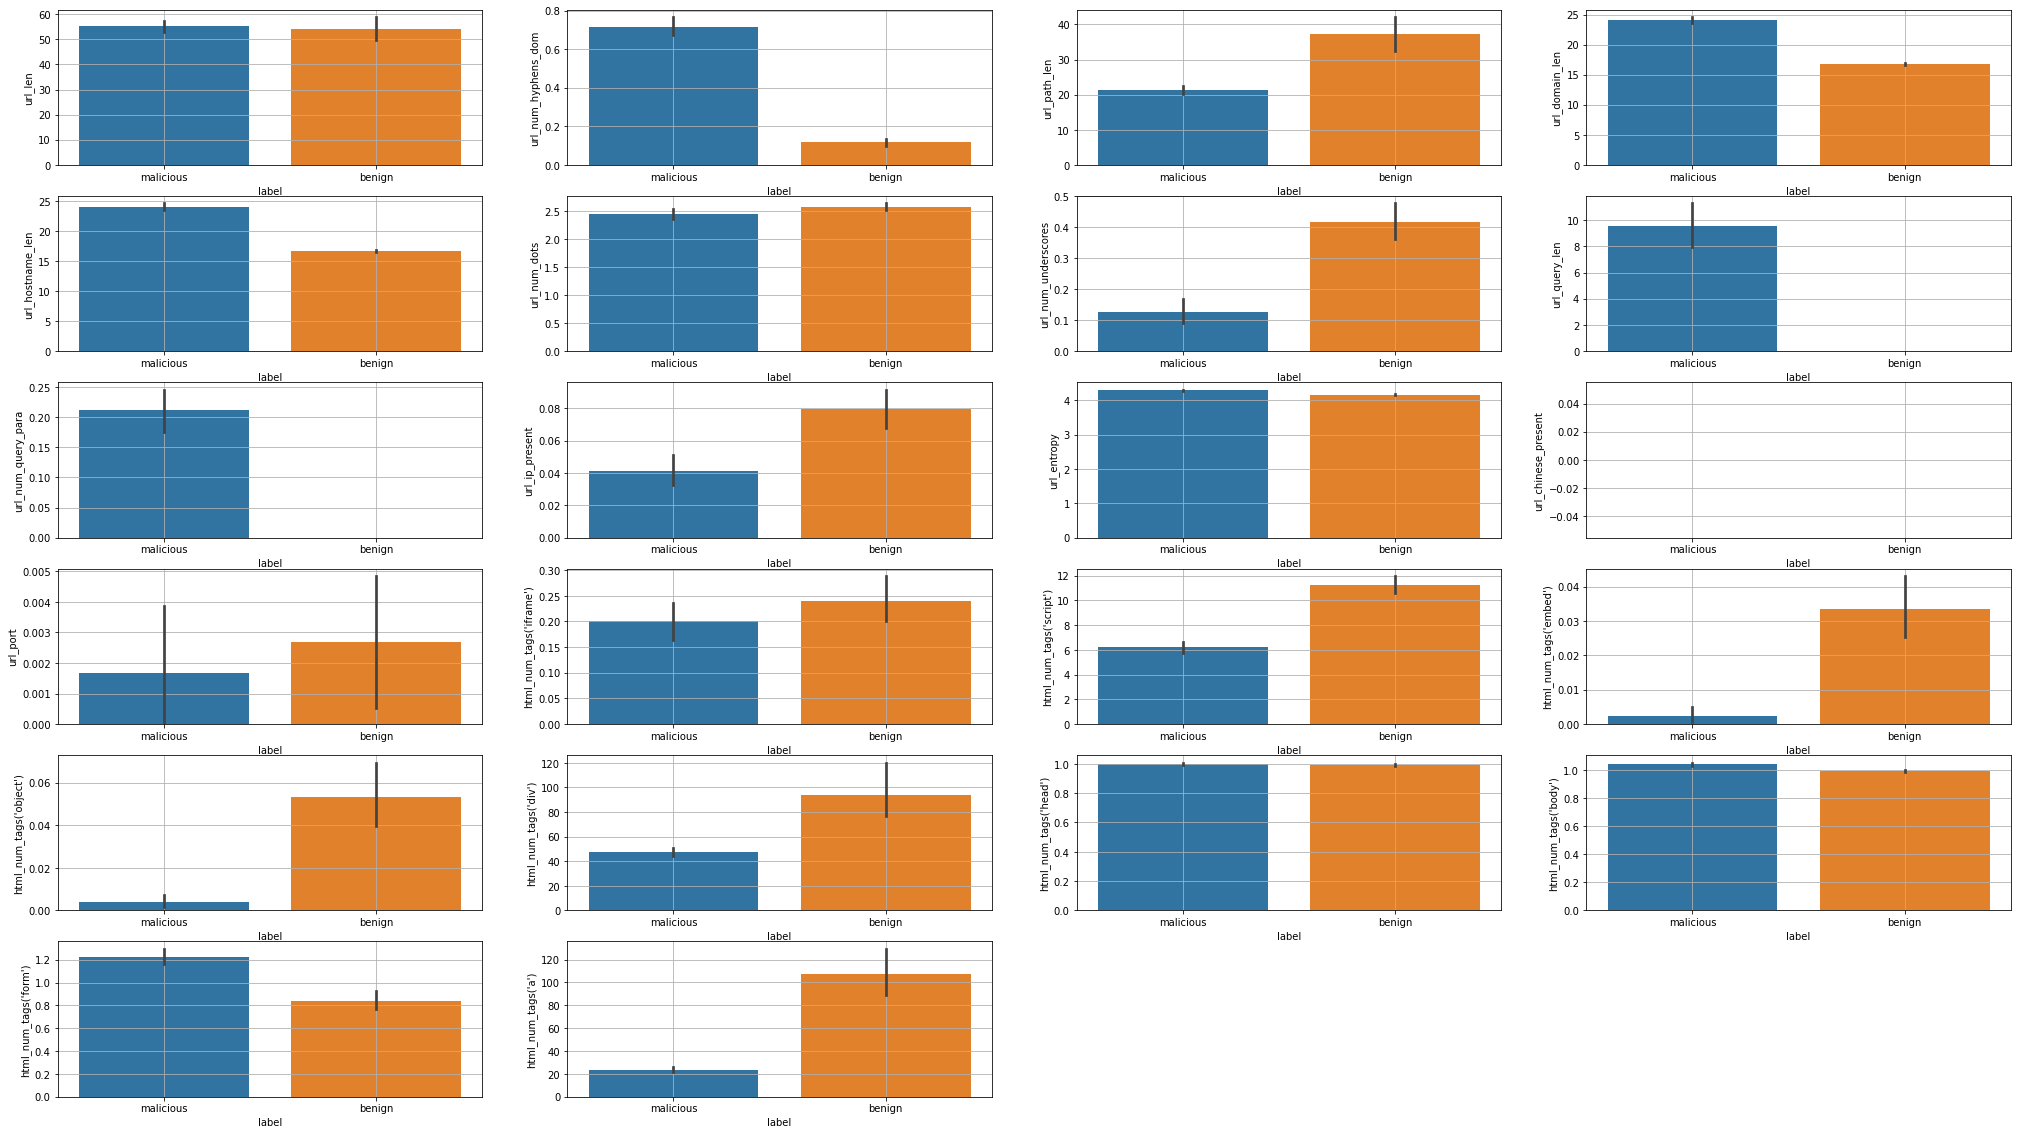

In [25]:
plt.figure(figsize = (35, 20))
for i in range(len(df.columns)-2):
    plt.subplot(6,4,i+1)
    sns.barplot(x="label", y=df.columns[i], data=df)
    plt.grid()
plt.show()

benign과 malicious가 눈에 띄게 차이 나는 value: 'url_num_hyphens_dom', 'url_num_underscores', 'url_query_len', 'url_num_query_para',
                                              'html_num_tags('embed')','html_num_tags('object')', 'html_num_tags('a')'
    
benign과 malicious가 적당히 차이 나는 value: 'url_path_len', 'url_domain_len', 'url_hostname_len', 'url_ip_present', 'html_num_tags('script')', 'html_num_tags('div')'

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [82]:
columns = ['url_num_hyphens_dom', 'url_num_underscores', 'url_query_len', 'url_num_query_para', "html_num_tags('embed')","html_num_tags('object')", "html_num_tags('a')",'label']

df_be = df[df['label'] == 'benign']
df_ma = df[df['label'] == 'malicious']
#정상 악성 분류 원하는 컬럼만
df_1 = df[columns]

df_be1 = df_be[columns]
df_ma1 = df_ma[columns]

In [88]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# Target 확인
target = 'label'

# 데이터 분리
x = df_1.drop(target, axis=1)
y = df_1.loc[:, target]

# 학습용, 평가용 데이터 8:2으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(random_state=1)

# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print('성능:', cv_score.round(2))
print('평균:', cv_score.mean().round(2))

성능: [0.79 0.84 0.82 0.85 0.8  0.82 0.84 0.83 0.82 0.84]
평균: 0.82


In [90]:
# 불러오기
from sklearn.metrics import confusion_matrix, classification_report

# 선언하기
model = DecisionTreeClassifier(max_depth=1, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[197 173]
 [ 54 309]]
              precision    recall  f1-score   support

      benign       0.78      0.53      0.63       370
   malicious       0.64      0.85      0.73       363

    accuracy                           0.69       733
   macro avg       0.71      0.69      0.68       733
weighted avg       0.71      0.69      0.68       733



# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [29]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [4]:
# 중복 데이터 제거를 제거합니다.


In [5]:
# 데이터 프레임의 info를 확인합니다.


---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [1]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [ ]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.

### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [3]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.






In [9]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인




---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [35]:
# 결축치의 존재를 확인합니다.



,url_num_hyphens_dom,url_num_underscores,url_query_len,url_num_query_para,html_num_tags('embed'),html_num_tags('object'),html_num_tags('a')
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,21.0
2,0.0,0.0,0.0,0.0,0.0,0.0,70.0
3,0.0,0.0,0.0,0.0,0.0,0.0,55.0
4,2.0,0.0,0.0,0.0,0.0,0.0,321.0
...,...,...,...,...,...,...,...
3659,3.0,0.0,0.0,0.0,0.0,0.0,3.0
3660,0.0,0.0,0.0,0.0,0.0,0.0,475.0
3661,1.0,0.0,0.0,0.0,0.0,0.0,103.0
3662,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [2]:
# 결측치를 적절히 처리해줍니다.




In [2]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>